In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
result_dir = "data/CCPD2020/test"
input_dir = "data/CCPD2020/processed_images"
val_dir = "data/CCPD2020/val_new"
img_height = 150
img_width = 200
batch_size = 1

In [3]:
input_dataset = tf.keras.utils.image_dataset_from_directory(
    input_dir,
    labels = None,
    image_size=(img_height,img_width),
    batch_size = batch_size,
    shuffle = False
)
resut_dataset = tf.keras.utils.image_dataset_from_directory(
    result_dir,
    labels = None,
    image_size=(img_height,img_width),
    batch_size = batch_size,
    shuffle = False
)


Found 4947 files.
Found 4947 files.


In [4]:
x_trian = tf.concat([x for x in input_dataset], axis=0).numpy().reshape([-1,img_height,img_width,3])
y_train = tf.concat([y for y in resut_dataset], axis=0).numpy().reshape([-1,img_height,img_width,3])

In [5]:
x_trian *= 1./255
y_train *= 1./255

In [6]:
dropout_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(img_height,img_width,3)),
    tf.keras.layers.Flatten(input_shape=(img_height,img_width,3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu')
])

dropout_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(img_height*img_width*3),
    tf.keras.layers.Reshape([img_height, img_width,3])
])

dropout_ae = tf.keras.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss = "mse", optimizer = "nadam")
history = dropout_ae.fit(x_trian, y_train, epochs = 10)

c:\via\machinelearning2\project\project\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 106s 644ms/step - loss: 0.0896
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 89s 574ms/step - loss: 0.0301
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 89s 575ms/step - loss: 0.0271
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 88s 569ms/step - loss: 0.0249
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 88s 568ms/step - loss: 0.0241
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 88s 570ms/step - loss: 0.0233
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 89s 571ms/step - loss: 0.0230
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 88s 569ms/step - loss: 0.0228
Epoch 9/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 89s 573ms/step - loss: 0.0216
Epoch 10/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 89s 571ms/step - loss: 0.0209


In [7]:
def plot_reconstructions(model, images, original_images, n_images=10):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1) #restrict predicted pixel values to lie between 0 and 1
    fig = plt.figure(figsize=(n_images * 5, 20))
    for image_index in range(n_images):
        plt.subplot(3, n_images, 1 + image_index)
        plt.imshow(original_images[image_index])
        plt.axis("off")
        plt.subplot(3, n_images, 1 + n_images + image_index)
        plt.imshow(images[image_index])
        plt.axis("off")
        plt.subplot(3, n_images, 1 + 2*n_images + image_index)
        plt.imshow(reconstructions[image_index])
        plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


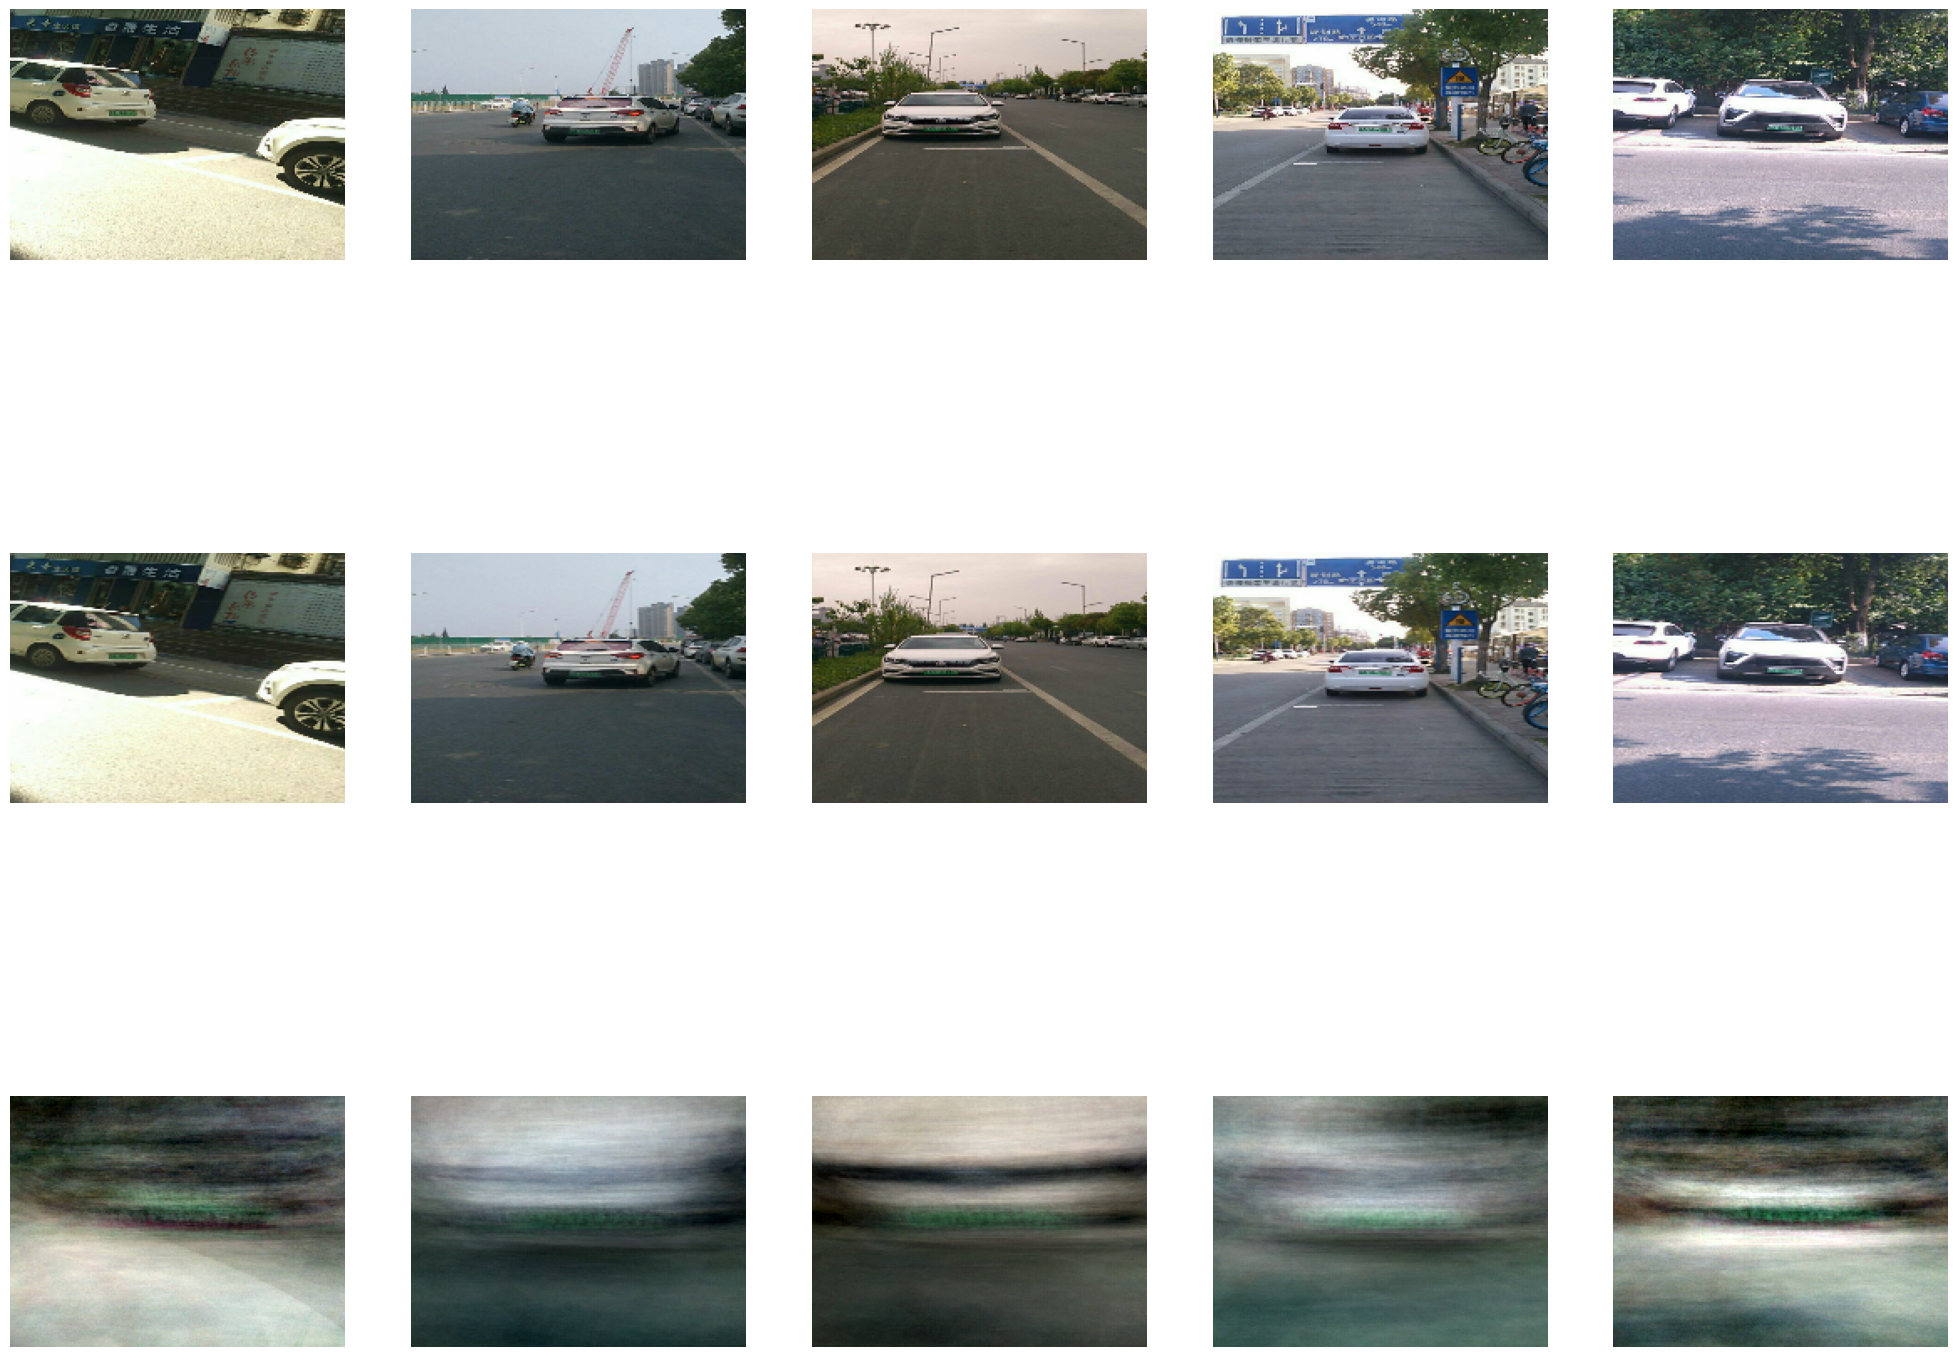

In [8]:
plot_reconstructions(dropout_ae,x_trian,y_train,5)